In [1]:
pip install pykan

In [2]:
import torch
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from kan import *


print(f'Using Pytorch version:{torch.__version__}')

if torch.cuda.is_available():
  print(f'Using GPU device: {torch.cuda.get_device_name(0)}')
  device = torch.device('cuda')
else:
  print('No GPU Found, using CPU instead')
  device = torch.device('cpu')

print('Using device:', device)

'''
#### Training Dataset #####

train_loader = torch.utils.data.DataLoader(
    MNIST(root='.', train=True, download=True,
          transform=transforms.ToTensor()),
    batch_size=100, shuffle=True, pin_memory=True)

#print(len(train_loader))

#### Test dataset ####
test_loader = torch.utils.data.DataLoader(
    MNIST(root='.', train=False, download=True,
          transform=transforms.ToTensor()),
    batch_size=100, shuffle=True, pin_memory=True)

'''

#### Training Dataset #####

train_dataset = datasets.MNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True, pin_memory=True)

#### Test dataset ####

test_dataset = datasets.MNIST(root='.', train=False, transform=transforms.ToTensor())
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False, pin_memory=True)


Using Pytorch version:2.3.0+cu121
No GPU Found, using CPU instead
Using device: cpu
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6061453.74it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 161673.13it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1514820.08it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8730764.79it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
#### Iterate over data ####

all_data = []

all_labels = []

for batch_idx, (data, target) in enumerate(train_loader):
    print(f"Batch ID = {batch_idx}")
    print(f"Data size = {data.size()}   Data type = {data.type()}")
    print(f"Target size = {target.size()}   Target type = {target.type()}")

    '''
    if batch_idx == 0:
        first_image = data[0]
        first_label = target[0]
        print("First image size:", first_image.size())
        print("First image label:", first_label)
    '''

    data_flat = data.view(data.size(0), -1)

    # Append to lists
    all_data.append(data_flat)
    all_labels.append(target)


# Concatenate all data and labels into tensors
train_input = torch.cat(all_data, dim=0)
train_label = torch.cat(all_labels, dim=0)

# Print shapes to verify
print(f"train_input shape: {train_input.shape}")
print(f"train_label shape: {train_label.shape}")






Batch ID = 0
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 1
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 2
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 3
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 4
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 5
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 6
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target s

In [4]:
#### iterate over test data

all_data_test = []

all_labels_test = []

for batch_idx, (data, target) in enumerate(test_loader):
    print(f"Batch ID = {batch_idx}")
    print(f"Data size = {data.size()}   Data type = {data.type()}")
    print(f"Target size = {target.size()}   Target type = {target.type()}")

    '''
    if batch_idx == 0:
        first_image = data[0]
        first_label = target[0]
        print("First image size:", first_image.size())
        print("First image label:", first_label)
    '''

    data_flat = data.view(data.size(0), -1)

    # Append to lists
    all_data_test.append(data_flat)
    all_labels_test.append(target)


# Concatenate all data and labels into tensors
test_input = torch.cat(all_data_test, dim=0)
test_label = torch.cat(all_labels_test, dim=0)

# Print shapes to verify
print(f"test_input shape: {test_input.shape}")
print(f"test_label shape: {test_label.shape}")

Batch ID = 0
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 1
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 2
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 3
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 4
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 5
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target size = torch.Size([100])   Target type = torch.LongTensor
Batch ID = 6
Data size = torch.Size([100, 1, 28, 28])   Data type = torch.FloatTensor
Target s

In [5]:


train_input = train_input.to(device)
train_label = train_label.to(device)
test_input = test_input.to(device)
test_label = test_label.to(device)

# Prepare dataset dictionary

dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}






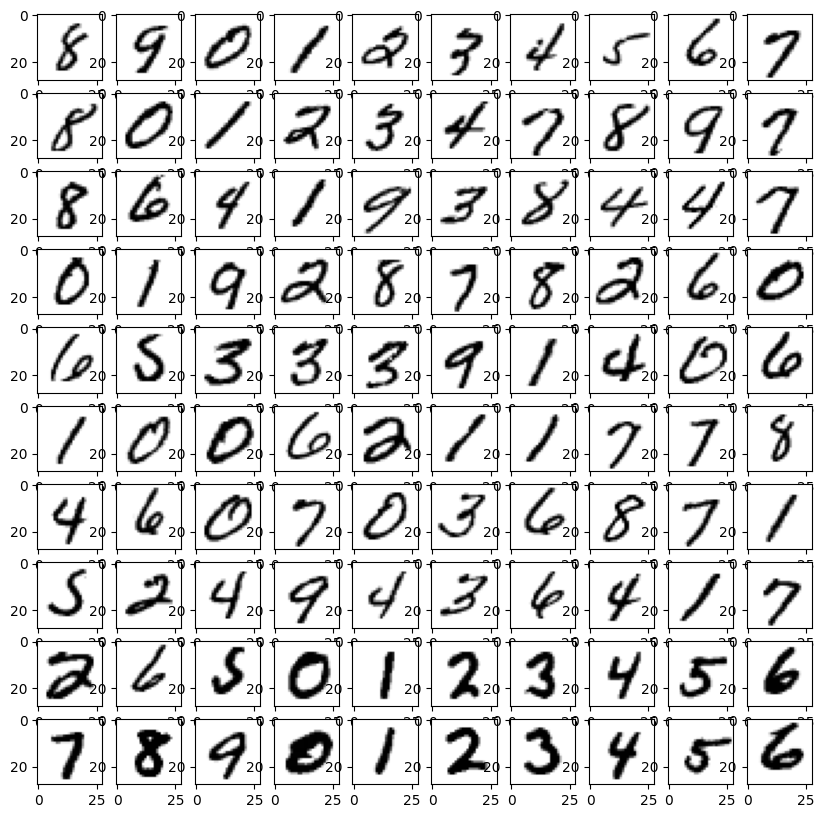

In [6]:
### print the first 100 digits ####
plt.figure(figsize = (10, 10))

for x in range(100):
    plt.subplot(10,10,x+1)
    plt.imshow(data[x,:,:,:].numpy().reshape(28,28),cmap="gray_r")

In [7]:
##### Implement KAN ######

model = KAN(width=[28*28,20,10], device = device)
model.to(device)


KAN(
  (biases): ModuleList(
    (0): Linear(in_features=20, out_features=1, bias=False)
    (1): Linear(in_features=10, out_features=1, bias=False)
  )
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)

In [9]:
model.train(dataset, device=device, opt="LBFGS", steps=20, batch=10, lamb=0.01, lamb_entropy=10.)

train loss: 1.17e+01 | test loss: 1.36e+01 | reg: 9.52e+04 : 100%|█| 20/20 [1:08:04<00:00, 204.22s/i


{'train_loss': [array(15.108253, dtype=float32),
  array(8.079994, dtype=float32),
  array(5.968518, dtype=float32),
  array(7.7045827, dtype=float32),
  array(21.963335, dtype=float32),
  array(11.42861, dtype=float32),
  array(19.871738, dtype=float32),
  array(6.647098, dtype=float32),
  array(6.1992183, dtype=float32),
  array(4.937734, dtype=float32),
  array(5.760567, dtype=float32),
  array(6.65386, dtype=float32),
  array(6.677671, dtype=float32),
  array(6.650953, dtype=float32),
  array(6.640205, dtype=float32),
  array(17.676153, dtype=float32),
  array(12.560569, dtype=float32),
  array(12.639882, dtype=float32),
  array(8.917973, dtype=float32),
  array(11.683199, dtype=float32)],
 'test_loss': [array(3760.0747, dtype=float32),
  array(450.6868, dtype=float32),
  array(5218.0737, dtype=float32),
  array(8022.121, dtype=float32),
  array(55.86196, dtype=float32),
  array(20.914433, dtype=float32),
  array(38.489914, dtype=float32),
  array(423.5643, dtype=float32),
  array(

In [ ]:
model.plot()